# 25 Time Series Prediction with LSTM Recurrent Neural Networks

## 25.1 LSTM Network For Regression

In [16]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
    skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

/Users/dchou/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dchou/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dchou/tensorflow/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1s - loss: 0.0413
Epoch 2/100
0s - loss: 0.0202
Epoch 3/100
0s - loss: 0.0146
Epoch 4/100
0s - loss: 0.0131
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0111
Epoch 7/100
0s - loss: 0.0102
Epoch 8/100
0s - loss: 0.0093
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0038
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

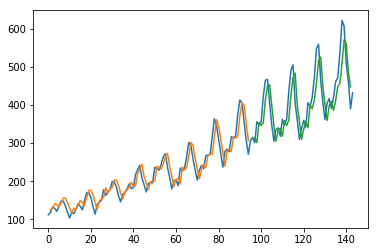

In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# ...
# Epoch 99/100
# 0s - loss: 0.0020
# Epoch 100/100
# 0s - loss: 0.0020
# Train Score: 22.92 RMSE
# Test Score: 47.53 RMSE

## 25.2 LSTM For Regression Using the Window Method

In [8]:
# reshape into X=t-2, t-1, t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

/Users/dchou/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dchou/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dchou/tensorflow/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1s - loss: 0.0542
Epoch 2/100
0s - loss: 0.0259
Epoch 3/100
0s - loss: 0.0167
Epoch 4/100
0s - loss: 0.0145
Epoch 5/100
0s - loss: 0.0129
Epoch 6/100
0s - loss: 0.0116
Epoch 7/100
0s - loss: 0.0104
Epoch 8/100
0s - loss: 0.0094
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0074
Epoch 11/100
0s - loss: 0.0066
Epoch 12/100
0s - loss: 0.0060
Epoch 13/100
0s - loss: 0.0056
Epoch 14/100
0s - loss: 0.0052
Epoch 15/100
0s - loss: 0.0050
Epoch 16/100
0s - loss: 0.0049
Epoch 17/100
0s - loss: 0.0046
Epoch 18/100
0s - loss: 0.0045
Epoch 19/100
0s - loss: 0.0045
Epoch 20/100
0s - loss: 0.0043
Epoch 21/100
0s - loss: 0.0043
Epoch 22/100
0s - loss: 0.0042
Epoch 23/100
0s - loss: 0.0042
Epoch 24/100
0s - loss: 0.0042
Epoch 25/100
0s - loss: 0.0040
Epoch 26/100
0s - loss: 0.0041
Epoch 27/100
0s - loss: 0.0040
Epoch 28/100
0s - loss: 0.0040
Epoch 29/100
0s - loss: 0.0039
Epoch 30/100
0s - loss: 0.0038
Epoch 31/100
0s - loss: 0.0038
Epoch 32/100
0s - loss: 0.0037
Epoch 33/100
0s -

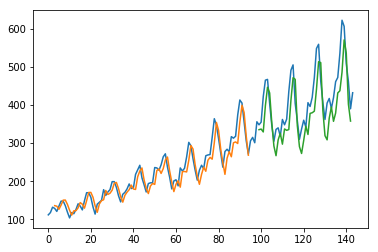

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# ...
# Epoch 99/100
# 0s - loss: 0.0022
# Epoch 100/100
# 0s - loss: 0.0020
# Train Score: 24.19 RMSE
# Test Score: 58.04 RMSE

## 25.3 LSTM For Regression with Time Steps

In [19]:
# reshape into X=t-2, t-1, t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
#OLD trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))      #NEW
#OLD testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))          #NEW

/Users/dchou/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/Users/dchou/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  after removing the cwd from sys.path.
/Users/dchou/tensorflow/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1s - loss: 0.0337
Epoch 2/100
0s - loss: 0.0131
Epoch 3/100
0s - loss: 0.0107
Epoch 4/100
0s - loss: 0.0092
Epoch 5/100
0s - loss: 0.0079
Epoch 6/100
0s - loss: 0.0067
Epoch 7/100
0s - loss: 0.0060
Epoch 8/100
0s - loss: 0.0052
Epoch 9/100
0s - loss: 0.0048
Epoch 10/100
0s - loss: 0.0044
Epoch 11/100
0s - loss: 0.0043
Epoch 12/100
0s - loss: 0.0042
Epoch 13/100
0s - loss: 0.0041
Epoch 14/100
0s - loss: 0.0042
Epoch 15/100
0s - loss: 0.0041
Epoch 16/100
0s - loss: 0.0041
Epoch 17/100
0s - loss: 0.0040
Epoch 18/100
0s - loss: 0.0041
Epoch 19/100
0s - loss: 0.0040
Epoch 20/100
0s - loss: 0.0040
Epoch 21/100
0s - loss: 0.0040
Epoch 22/100
0s - loss: 0.0039
Epoch 23/100
0s - loss: 0.0040
Epoch 24/100
0s - loss: 0.0041
Epoch 25/100
0s - loss: 0.0039
Epoch 26/100
0s - loss: 0.0040
Epoch 27/100
0s - loss: 0.0038
Epoch 28/100
0s - loss: 0.0038
Epoch 29/100
0s - loss: 0.0038
Epoch 30/100
0s - loss: 0.0040
Epoch 31/100
0s - loss: 0.0037
Epoch 32/100
0s - loss: 0.0038
Epoch 33/100
0s -

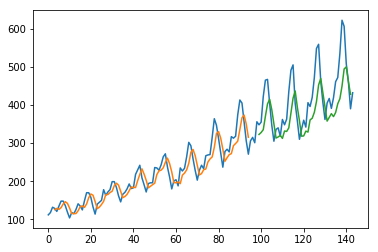

In [20]:
# create and fit the LSTM network
model = Sequential()
#OLD model.add(LSTM(4, input_dim=look_back))
model.add(LSTM(4, input_dim=1))                                            #NEW
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# ...
# Epoch 99/100
# 0s - loss: 0.0021
# Epoch 100/100
# 0s - loss: 0.0020
# Train Score: 23.69 RMSE
# Test Score: 58.95 RMSE

## 25.4 LSTM With Memory Between Batches

In [26]:
# reshape into X=t-2, t-1, t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Epoch 1/1
1s - loss: 0.0100
Epoch 1/1
0s - loss: 0.0151
Epoch 1/1
0s - loss: 0.0094
Epoch 1/1
0s - loss: 0.0070
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss:

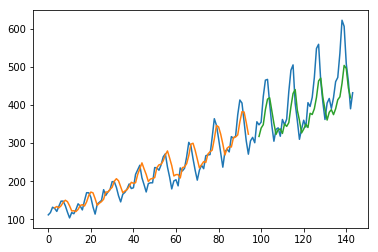

In [22]:
# create and fit the LSTM network
batch_size = 1                                                                   #NEW
model = Sequential()
#OLD model.add(LSTM(4, input_dim=1))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))  #NEW
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#OLD model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
for i in range(100):                                                             #NEW
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size,                   #NEW
              verbose=2, shuffle=False)                                          #NEW
    model.reset_states()                                                         #NEW

# make predictions
#OLD trainPredict = model.predict(trainX)
trainPredict = model.predict(trainX, batch_size=batch_size)                      #NEW
model.reset_states()                                                             #NEW 
#OLD testPredict = model.predict(testX)
testPredict = model.predict(testX, batch_size=batch_size)                        #NEW 
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# ...
# Epoch 1/1
# 0s - loss: 0.0026
# Epoch 1/1
# 0s - loss: 0.0025
# Train Score: 26.27 RMSE
# Test Score: 59.08 RMSE

## 25.5 Stacked LSTMs With Memory Between Batches

Epoch 1/1
3s - loss: 0.0063
Epoch 1/1
1s - loss: 0.0201
Epoch 1/1
1s - loss: 0.0150
Epoch 1/1
1s - loss: 0.0125
Epoch 1/1
1s - loss: 0.0101
Epoch 1/1
1s - loss: 0.0081
Epoch 1/1
1s - loss: 0.0068
Epoch 1/1
1s - loss: 0.0061
Epoch 1/1
1s - loss: 0.0058
Epoch 1/1
1s - loss: 0.0056
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0053
Epoch 1/1
1s - loss: 0.0053
Epoch 1/1
1s - loss: 0.0052
Epoch 1/1
1s - loss: 0.0052
Epoch 1/1
1s - loss: 0.0051
Epoch 1/1
1s - loss: 0.0051
Epoch 1/1
1s - loss: 0.0051
Epoch 1/1
1s - loss: 0.0051
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0048
Epoch 1/1
1s - loss: 0.0048
Epoch 1/1
1s - loss: 0.0048
Epoch 1/1
1s - loss: 0.0047
Epoch 1/1
1s - loss: 0.0047
Epoch 1/1
1s - loss: 0.0046
Epoch 1/1
1s - loss:

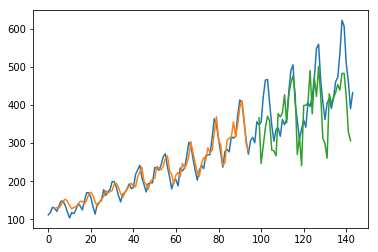

In [27]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
#OLD model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,   #NEW
              return_sequences=True))                                            #NEW
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))  #NEW
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size,
              verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# ...
# Epoch 1/1
# 4s - loss: 0.0027
# Epoch 1/1
# 4s - loss: 0.0026
# Train Score: 18.63 RMSE
# Test Score: 74.24 RMSE